# **Źródła danych**

Dane pochodzą z 3 źródeł:

*   **platnosci.csv** z kolumnami id, data_platności, wartosc_platnosci, id_pakietu, id_pojazdu, pakiet;
*   **pakiety.xlsx** z kolumnami data_produkcji, id;
*   **pakiety.paquet** z kolumnami pakiet_start, pakiet_koniec, id_pakietu, id_pojazdu, pakiet.

Aby przeanalizować zestaw danych, należy te dane połączyć w odpowiedni sposób i na tej podstawie wyciągnąć wnioski i obserwacje.

W początkowej fazie, pliki z danymi będą analizowane osobno, natomiast potem dojdzie do ich połączenia.






# **Instalacje i importy**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

warnings.filterwarnings('ignore')

from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Analiza pierwszego źródła danych z płatnościami**

In [ ]:
# Wczytanie ramki z płatnościami, ustawienie separatora oraz parsera dla kolumny z datą
df1 = pd.read_csv("gdrive/My Drive/platnosci.csv", delimiter=r"\s+", parse_dates=['data_platnosci'])

In [ ]:
# Kształt danych
df1.shape

(28829, 6)

In [ ]:
# Wyświetlenie pierwszych 5 rekordów
df1.head()

,id,data_platnosci,wartosc_platnosci,id_pakietu,id_pojazdu,pakiet
0,32046084,2031-09-10,1582.0,1193684312178,6c119d266a4f,elektrycznie_ustawiane_fotele
1,25730340,2032-04-17,10649.0,1456887188800,46aed7fc3254,wentylacja_foteli
2,146719944,2038-02-25,0.0,1420549867966,3fa5fbebe1ea,elektryczne_szyby_przod
3,32721088,2031-11-14,2285.0,1068470198058,0d865d0dd29b,elektrycznie_ustawiane_fotele
4,18724446,2031-12-27,2834.0,1407866317767,a1456016b732,elektrycznie_ustawiane_fotele


In [ ]:
# Typy danych - 2 numeryczne, 1 typu datetime oraz 3 object
df1.dtypes

id                            int64
data_platnosci       datetime64[ns]
wartosc_platnosci            object
id_pakietu                    int64
id_pojazdu                   object
pakiet                       object
dtype: object

In [ ]:
# Ilość unikalnych wartości dla każdej z kolumn
print(df1.nunique())

id                   28821
data_platnosci         666
wartosc_platnosci     7533
id_pakietu           28343
id_pojazdu           13619
pakiet                  15
dtype: int64


In [ ]:
# Informacje o zbiorze
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28829 entries, 0 to 28828
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 28829 non-null  int64         
 1   data_platnosci     28829 non-null  datetime64[ns]
 2   wartosc_platnosci  28829 non-null  object        
 3   id_pakietu         28829 non-null  int64         
 4   id_pojazdu         28829 non-null  object        
 5   pakiet             28829 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
# Sprawdzenie czy występują wartości null - nie występują
print(df1.isnull().sum())

id                   0
data_platnosci       0
wartosc_platnosci    0
id_pakietu           0
id_pojazdu           0
pakiet               0
dtype: int64


In [ ]:
# Sprawdzenie czy występują wartości nan - nie występują
print(df1.isna().sum())

id                   0
data_platnosci       0
wartosc_platnosci    0
id_pakietu           0
id_pojazdu           0
pakiet               0
dtype: int64


In [ ]:
# Zamiana nazwy kolumny id na bardziej opisową - id_platnosci
df1 = df1.rename(columns={'id': 'id_platnosci'})
df1.columns

Index(['id_platnosci', 'data_platnosci', 'wartosc_platnosci', 'id_pakietu',
       'id_pojazdu', 'pakiet'],
      dtype='object')

In [ ]:
# Usunięcie kolumny pakiet jako nieistotnej z punktu widzenia dalszej analizy
df1 = df1.drop(['pakiet'], axis=1)
df1.columns

Index(['id_platnosci', 'data_platnosci', 'wartosc_platnosci', 'id_pakietu',
       'id_pojazdu'],
      dtype='object')

In [ ]:
# Ujednolicenie separatora dziesiętnego w kolumnie wartosc_platnosci (zamiana przecinka na kropkę)
df1['wartosc_platnosci'] = df1['wartosc_platnosci'].apply(lambda x: x.replace(',','.'))

In [ ]:
# Zamiana typu kolumny wartosc_platnosci z object na numerical - zmniejszenie ilości pamięci zajmowanej przez ramkę
df1['wartosc_platnosci'] = pd.to_numeric(df1['wartosc_platnosci'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28829 entries, 0 to 28828
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_platnosci       28829 non-null  int64         
 1   data_platnosci     28829 non-null  datetime64[ns]
 2   wartosc_platnosci  28829 non-null  float64       
 3   id_pakietu         28829 non-null  int64         
 4   id_pojazdu         28829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
# Sprawdzenie czy w ramce występują duplikaty - brak duplikatów
dupl = df1[df1.duplicated()]
print(len(dupl))

0


# **Analiza drugiego źródła danych z pojazdami**

In [ ]:
# Wczytanie ramki z pojazdami
df2 = pd.read_excel("gdrive/My Drive/pojazdy.xlsx")

In [ ]:
# Kształt danych
df2.shape

(58044, 2)

In [ ]:
# Wyświetlneie pierwszych 5 rekordów
df2.head()

,Unnamed: 0,Unnamed: 1
0,2039-04-01 00:06:51.749162+01:00,cd2c0ac6c6f2
1,NaN,NaN
2,data_produkcji,id
3,NaN,NaN
4,NaN,NaN


In [ ]:
# Przypisanie nazw kolumnom
df2 = df2.rename(columns={'Unnamed: 0': 'data_produkcji', 'Unnamed: 1': 'id_pojazdu'})
df2.head()

,data_produkcji,id_pojazdu
0,2039-04-01 00:06:51.749162+01:00,cd2c0ac6c6f2
1,NaN,NaN
2,data_produkcji,id
3,NaN,NaN
4,NaN,NaN


In [ ]:
# Sprawdzenie czy występują wartości null - niewielka ilość
print(df2.isnull().sum())

data_produkcji    6
id_pojazdu        4
dtype: int64


In [ ]:
# Sprawdzenie czy występują wartości nan - niewielka ilość
print(df2.isna().sum())

data_produkcji    6
id_pojazdu        4
dtype: int64


In [ ]:
# Ze względu na niewielką ilość danych brakujących, wiersze z nimi zostaną usunięte, a index zresetowany
df2 = df2.dropna().reset_index(drop=True)

In [ ]:
# Sprawdzenie czy wystepują wartości null - nie występują
print(df2.isnull().sum())

data_produkcji    0
id_pojazdu        0
dtype: int64


In [ ]:
# Usunięcie wiersza reprezentującego nagłówek
df2 = df2[~df2['data_produkcji'].str.contains('data_produkcji')]
df2.head()

,data_produkcji,id_pojazdu
0,2039-04-01 00:06:51.749162+01:00,cd2c0ac6c6f2
2,2037-12-22 00:00:00+01:00,a191ee3933fe
3,2038-10-15 00:00:00+02:00,299378fdf536
4,2038-10-14 00:00:00+02:00,6b4cb1b7aa06
5,2039-03-10 03:05:05.516508+01:00,fcf5291b9c6f


In [ ]:
# W kolumnie data_produkcji pojawia się wartosc 'dzisiaj', która zostaje zamieniona na bieżącą datę
today = pd.Timestamp.now().strftime("%d%b%Y")
df2.loc[df2['data_produkcji'] == 'dzisiaj', 'data_produkcji'] = today

In [ ]:
# Kolumna pomocnicza reprezentująca string dla kolumny data_produkcji
df2['data_produkcji_str'] = df2['data_produkcji'].astype(str)
df2.head()

,data_produkcji,id_pojazdu,data_produkcji_str
0,2039-04-01 00:06:51.749162+01:00,cd2c0ac6c6f2,2039-04-01 00:06:51.749162+01:00
2,2037-12-22 00:00:00+01:00,a191ee3933fe,2037-12-22 00:00:00+01:00
3,2038-10-15 00:00:00+02:00,299378fdf536,2038-10-15 00:00:00+02:00
4,2038-10-14 00:00:00+02:00,6b4cb1b7aa06,2038-10-14 00:00:00+02:00
5,2039-03-10 03:05:05.516508+01:00,fcf5291b9c6f,2039-03-10 03:05:05.516508+01:00


In [ ]:
# Kolumna pomocnicza, która zawiera wyłącznie datę z kolumny data_produkcji
df2['data_produkcji_poj'] = df2['data_produkcji_str'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
df2.head()

,data_produkcji,id_pojazdu,data_produkcji_str,data_produkcji_poj
0,2039-04-01 00:06:51.749162+01:00,cd2c0ac6c6f2,2039-04-01 00:06:51.749162+01:00,2039-04-01
2,2037-12-22 00:00:00+01:00,a191ee3933fe,2037-12-22 00:00:00+01:00,2037-12-22
3,2038-10-15 00:00:00+02:00,299378fdf536,2038-10-15 00:00:00+02:00,2038-10-15
4,2038-10-14 00:00:00+02:00,6b4cb1b7aa06,2038-10-14 00:00:00+02:00,2038-10-14
5,2039-03-10 03:05:05.516508+01:00,fcf5291b9c6f,2039-03-10 03:05:05.516508+01:00,2039-03-10


In [ ]:
# Usunięcie kolumn pomocniczych
df2 = df2.drop(columns =['data_produkcji', 'data_produkcji_str'], axis=1)
df2.head()

,id_pojazdu,data_produkcji_poj
0,cd2c0ac6c6f2,2039-04-01
2,a191ee3933fe,2037-12-22
3,299378fdf536,2038-10-15
4,6b4cb1b7aa06,2038-10-14
5,fcf5291b9c6f,2039-03-10


In [ ]:
# Informacje o zbiorze
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58037 entries, 0 to 58037
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_pojazdu          58037 non-null  object
 1   data_produkcji_poj  58037 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [ ]:
# # Zmiana typu kolumny data_produkcji_poj
df2['data_produkcji_poj'] = pd.to_datetime(df2['data_produkcji_poj'])

In [ ]:
# Informacje o zbiorze
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58037 entries, 0 to 58037
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_pojazdu          58037 non-null  object        
 1   data_produkcji_poj  58037 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 3.3+ MB


In [ ]:
# Ilość unikalnych wartości dla każdej z kolumn
print(df2.nunique())

id_pojazdu            58037
data_produkcji_poj      535
dtype: int64


In [ ]:
# Sprawdzenie czy występują wartości nan - nie występują
print(df2.isna().sum())

id_pojazdu            0
data_produkcji_poj    0
dtype: int64


In [ ]:
# Sprawdzenie czy występują wartości null - nie występują
print(df2.isnull().sum())

id_pojazdu            0
data_produkcji_poj    0
dtype: int64


In [ ]:
# Sprawdzenie czy w ramce występują duplikaty - brak duplikatów
dupl = df2[df2.duplicated()]
print(len(dupl))

0


# **Analiza trzeciego źródła danych z pakietami**

In [ ]:
# Wczytanie ramki z pakietami
df3 = pd.read_parquet("gdrive/My Drive/pakiety.parquet")

In [ ]:
# Kształt danych
df3.shape

(57085, 5)

In [ ]:
# Wyświetlneie pierwszych 5 rekordów
df3.head()

,pakiet_start,pakiet_koniec,id,id_pojazdu,pakiet
0,2038-10-10,2038-11-08,1257529856278,41928df7c465,klimatyzacja_manualna
1,2030-11-16,2031-11-17,1033358111690,0d865d0dd29b,elektrycznie_ustawiane_fotele
2,2026-02-11,2027-02-13,1145318675962,a1456016b732,elektrycznie_ustawiane_fotele
3,2039-01-30,2039-03-14,1104691818322,a88aea4f0e1d,elektryczne_szyby_przod
4,2031-02-13,2032-02-14,1027812958445,a1456016b732,elektrycznie_ustawiane_fotele


In [ ]:
# Informacje o zbiorze
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57085 entries, 0 to 57084
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   pakiet_start   57085 non-null  datetime64[ns]
 1   pakiet_koniec  57085 non-null  datetime64[ns]
 2   id             57085 non-null  int64         
 3   id_pojazdu     57085 non-null  object        
 4   pakiet         57085 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 2.2+ MB


In [ ]:
# Ilość unikalnych wartości dla każdej z kolumn
print(df3.nunique())

pakiet_start       576
pakiet_koniec      623
id               57085
id_pojazdu       46914
pakiet              11
dtype: int64


In [ ]:
# Sprawdzenie czy występują wartości null - nie występują
print(df3.isnull().sum())

pakiet_start     0
pakiet_koniec    0
id               0
id_pojazdu       0
pakiet           0
dtype: int64


In [ ]:
# Sprawdzenie czy występują wartości nan - nie występują
print(df3.isna().sum())

pakiet_start     0
pakiet_koniec    0
id               0
id_pojazdu       0
pakiet           0
dtype: int64


In [ ]:
# Zamiana nazwy kolumny id na bardziej opisową - id_pakietu
df3 = df3.rename(columns={'id': 'id_pakietu'})
df3.columns

Index(['pakiet_start', 'pakiet_koniec', 'id_pakietu', 'id_pojazdu', 'pakiet'], dtype='object')

In [ ]:
# Usunięcie kolumn pakiet oraz id_pojazdu jako nieistotnych z punktu widzenia dalszej analizy
df3 = df3.drop(['pakiet', 'id_pojazdu'], axis=1)
df3.columns

Index(['pakiet_start', 'pakiet_koniec', 'id_pakietu'], dtype='object')

In [ ]:
# Sprawdzenie czy w ramce występują duplikaty - brak
dupl = df3[df3.duplicated()]
print(len(dupl))

0


# **Łączenie danych**

In [ ]:
# Połączenie tabeli z płatnościami i pojazdami po kolumnie id_pojazdu
df1_df2 = pd.merge(df1, df2, on='id_pojazdu', how='left')
df1_df2.head()

,id_platnosci,data_platnosci,wartosc_platnosci,id_pakietu,id_pojazdu,data_produkcji_poj
0,32046084,2031-09-10,1582.0,1193684312178,6c119d266a4f,2027-03-21
1,25730340,2032-04-17,10649.0,1456887188800,46aed7fc3254,2026-02-24
2,146719944,2038-02-25,0.0,1420549867966,3fa5fbebe1ea,2038-02-25
3,32721088,2031-11-14,2285.0,1068470198058,0d865d0dd29b,2026-10-05
4,18724446,2031-12-27,2834.0,1407866317767,a1456016b732,2026-01-29


In [ ]:
# Kształt danych
df1_df2.shape

(28829, 6)

In [ ]:
# Sprawdzenie czy w zbiorze występują wartości na - 1 rekord
print(df1_df2[df1_df2.isna().any(axis=1)])

       id_platnosci data_platnosci  wartosc_platnosci     id_pakietu  \
13624     182880018     2038-11-04              804.0  1439538798199   

         id_pojazdu data_produkcji_poj  
13624  76395bef63b1                NaT  


In [ ]:
# Usunięcie wiersza z brakującą wartością
df1_df2 = df1_df2.dropna()

In [ ]:
# Sprawdzenie czy w zbiorze występują wartości na - brak
print(df1_df2[df1_df2.isna().any(axis=1)])

Empty DataFrame
Columns: [id_platnosci, data_platnosci, wartosc_platnosci, id_pakietu, id_pojazdu, data_produkcji_poj]
Index: []


In [ ]:
# Połączenie tabeli df1_df2 z tabelą z pakietami po kolumnie id_pakietu
all = pd.merge(df1_df2, df3, on='id_pakietu', how='left')
all.head()

,id_platnosci,data_platnosci,wartosc_platnosci,id_pakietu,id_pojazdu,data_produkcji_poj,pakiet_start,pakiet_koniec
0,32046084,2031-09-10,1582.0,1193684312178,6c119d266a4f,2027-03-21,2031-09-09,2032-09-09
1,25730340,2032-04-17,10649.0,1456887188800,46aed7fc3254,2026-02-24,2032-04-19,2033-04-19
2,146719944,2038-02-25,0.0,1420549867966,3fa5fbebe1ea,2038-02-25,2038-01-30,2038-03-18
3,32721088,2031-11-14,2285.0,1068470198058,0d865d0dd29b,2026-10-05,2031-11-16,2032-11-16
4,18724446,2031-12-27,2834.0,1407866317767,a1456016b732,2026-01-29,2032-02-14,2033-02-14


In [ ]:
# Kształt danych
all.shape

(28828, 8)

In [ ]:
# Sprawdzenie czy występują wartości na - występują w dużej ilości
print(all.isna().sum())

id_platnosci              0
data_platnosci            0
wartosc_platnosci         0
id_pakietu                0
id_pojazdu                0
data_produkcji_poj        0
pakiet_start          18391
pakiet_koniec         18391
dtype: int64


In [ ]:
# Wyświetlenie wierszy z brakami
print(all[all.isna().any(axis=1)])

       id_platnosci data_platnosci  wartosc_platnosci     id_pakietu  \
39        189678270     2038-09-25             2037.0  1102762188550   
47        162925152     2038-08-02              915.0  1467793895060   
52        193150962     2038-10-13              127.0  1289363077301   
65        154797608     2038-09-26              137.0  1289167506280   
71        174937350     2038-12-09             5461.0  1426357102070   
...             ...            ...                ...            ...   
28814     185696511     2039-04-10              902.0  1329018849122   
28820     144142269     2039-04-12             2598.0  1292858959750   
28821     191200312     2039-04-10             1203.0  1228563775505   
28823     156302520     2039-04-16              717.0  1300959019062   
28825     255076164     2039-04-15              416.0  1036006743343   

         id_pojazdu data_produkcji_poj pakiet_start pakiet_koniec  
39     836f4287a5f8         2038-08-21          NaT           NaT  

In [ ]:
# Sprawdzenie czy występują duplikaty - nie występują
dupl = all[all.duplicated()]
print(len(dupl))

0


In [ ]:
# Zamiana wartości NA na 'Brak'
all['pakiet_start'].fillna('Brak', inplace=True)
all['pakiet_koniec'].fillna('Brak', inplace=True)

In [ ]:
# Sprawdzenie czy braki w danych występują - brak
print(all[all.isna().any(axis=1)])

Empty DataFrame
Columns: [id_platnosci, data_platnosci, wartosc_platnosci, id_pakietu, id_pojazdu, data_produkcji_poj, pakiet_start, pakiet_koniec]
Index: []


# **Pytanie 1**

## Ile jest miesięcznie produkowanych samochodów?

In [ ]:
# Dodanie kolumn pomocniczych reprezentujących rok i miesiąc dla kolumny data_produkcji
df2['rok_produkcji'] = df2['data_produkcji_poj'].dt.year
df2['mc_produkcji'] = df2['data_produkcji_poj'].dt.month

In [ ]:
# Wykorzystam ramkę z pojazdami pogrupowaną ze względu na miesiąc oraz rok
poj_rok_mc = df2[['id_pojazdu']].groupby([df2['rok_produkcji'], df2['mc_produkcji']]).agg(ilosc=('id_pojazdu', 'count')).reset_index()
poj_rok_mc

,rok_produkcji,mc_produkcji,ilosc
0,2024,2,1
1,2024,4,1
2,2024,8,1
3,2025,4,2
4,2025,6,1
5,2025,7,1
6,2025,8,1
7,2026,1,1
8,2026,2,1
9,2026,5,2


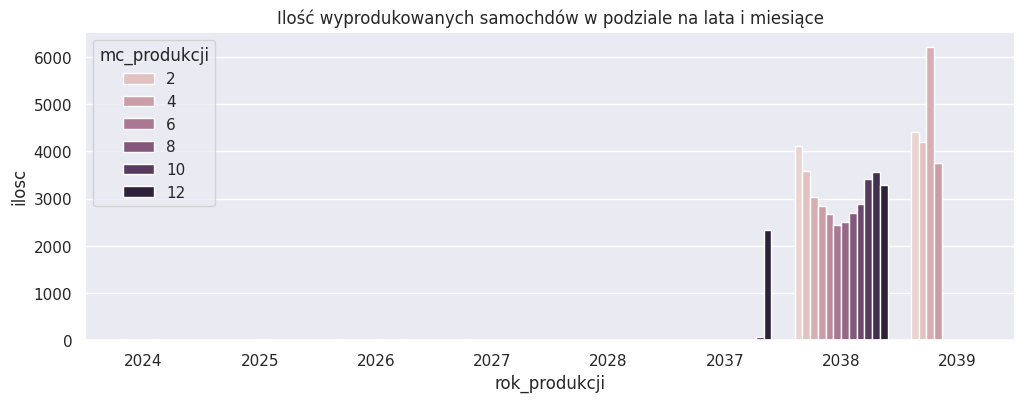

In [ ]:
# Barplot przedstawiający ilości samochodów w podziale na rok i miesiąc
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=poj_rok_mc, y='ilosc', x='rok_produkcji', hue='mc_produkcji')
plt.title('Ilość wyprodukowanych samochdów w podziale na lata i miesiące')
plt.show(g)

In [ ]:
# Wykorzystam ramkę z pojazdami pogrupowaną ze względu na miesiąc
poj_mc = df2[['id_pojazdu']].groupby([df2['mc_produkcji']]).agg(ilosc=('id_pojazdu', 'count')).reset_index()
poj_mc

,mc_produkcji,ilosc
0,1,8513
1,2,7798
2,3,9252
3,4,6601
4,5,2680
5,6,2435
6,7,2515
7,8,2693
8,9,2884
9,10,3418


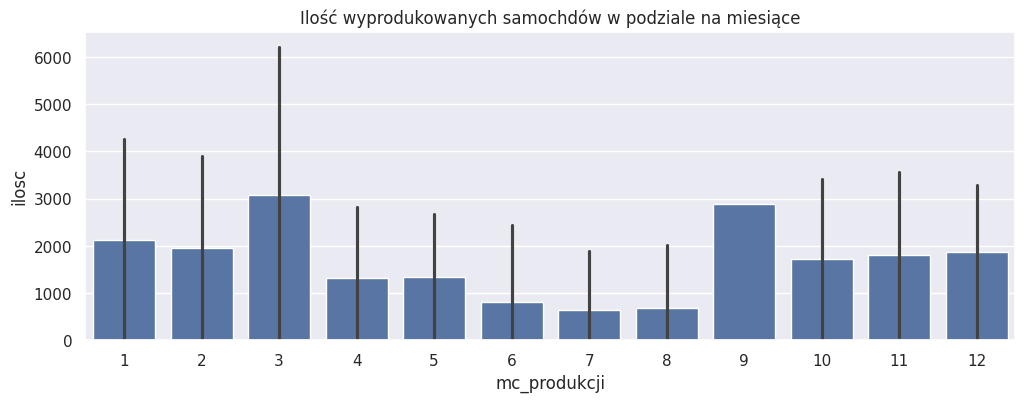

In [ ]:
# Barplot przedstawiający ilości samochodów w podziale na miesiąc - najwięcej produkowanych w marcu i wrześniu, najmniej w lipcu i sierpniu
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=poj_rok_mc, y='ilosc', x='mc_produkcji')
plt.title('Ilość wyprodukowanych samochodów w podziale na miesiące')
plt.show(g)

# **Pytanie 2**

## Ile jest miesięcznie aktywnych danych pakietów (mających płatności)?

In [ ]:
# Dodanie kolumn pomocniczych reprezentujących rok i miesiąc dla kolumny data_platnosci
all['rok_platnosci'] = all['data_platnosci'].dt.year
all['mc_platnosci'] = all['data_platnosci'].dt.month

In [ ]:
# Jako aktywny pakiet przyjmuję taki, który znajdował się w tabeli all ze wszystkimi danymi, a tym samym miał powiązaną z nim płatność
pak_rok_mc = all[['id_pakietu']].groupby([all['rok_platnosci'], all['mc_platnosci']]).agg(ilosc=('id_pakietu', 'count')).reset_index()
pak_rok_mc

,rok_platnosci,mc_platnosci,ilosc
0,2025,9,1
1,2025,10,1
2,2025,11,1
3,2026,1,1
4,2026,2,1
...,...,...,...
85,2038,12,2006
86,2039,1,2718
87,2039,2,2893
88,2039,3,3793


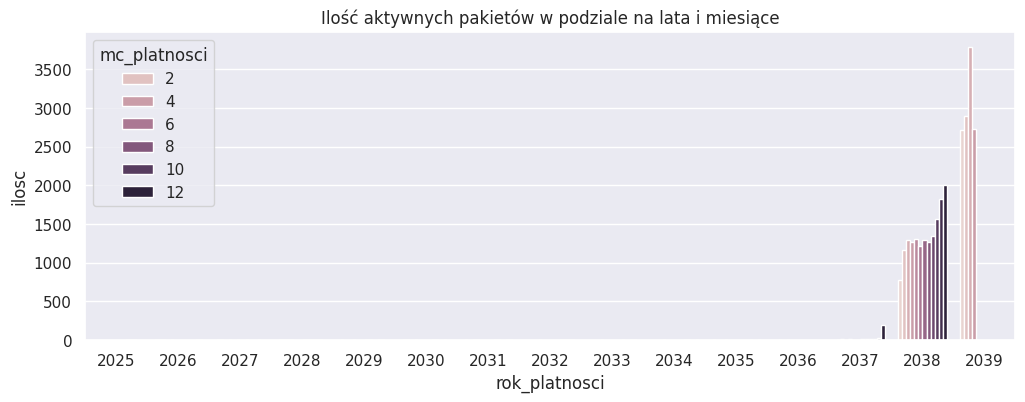

In [ ]:
# Barplot przedstawiający ilości aktywnych pakietów w podziale na rok i miesiąc
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=pak_rok_mc, y='ilosc', x='rok_platnosci', hue='mc_platnosci')
plt.title('Ilość aktywnych pakietów w podziale na lata i miesiące (mających płatności)')
plt.show(g)

In [ ]:
# Wykorzystam ramkę z płatnościami pogrupowaną ze względu na miesiąc
pak_mc = all[['id_pakietu']].groupby([all['mc_platnosci']]).agg(ilosc=('id_pakietu', 'count')).reset_index()
pak_mc

,mc_platnosci,ilosc
0,1,3503
1,2,4073
2,3,5094
3,4,4012
4,5,1309
5,6,1227
6,7,1311
7,8,1282
8,9,1375
9,10,1584


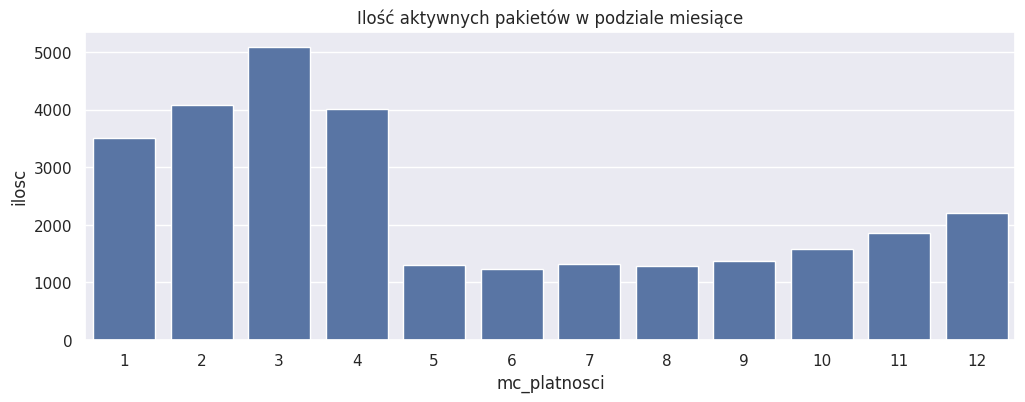

In [ ]:
# Barplot przedstawiający ilości aktywnych pakietów w podziale na miesiąc - najwięcej aktywnych pakietów w marcu i lutym, a najmniej we czerwcu i sierpniu
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=pak_mc, y='ilosc', x='mc_platnosci')
plt.title('Ilość aktywnych pakietów w podziale miesiące')
plt.show(g)

# **Pytanie 3**

## Ile jest miesięcznie aktywnych danych pakietów (nie mających powiązanej płatności)?

In [ ]:
# Tworzę ramkę pomocniczą z id_pakietu, które są w tabeli all ze wszystkimi płatnościami
pakiet_platnosc = all[['id_pakietu']]

In [ ]:
# Tworzę ramkę pomocniczą z id_pakietu z ramki df3 ze wszystkimi pakietami
pakiet_wszystkie = df3[['id_pakietu']]

In [ ]:
# Tworzę ramkę, która będzie zawierała te id_pakietu, które występują w pakiet_wszystkie, ale nie występują w pakiet_platnosc (interpretacja braku powiązanej platnosci)
pakiet_bez_platnosci = pakiet_wszystkie.merge(pakiet_platnosc.drop_duplicates(), on=['id_pakietu','id_pakietu'],
                   how='left', indicator=True)

In [ ]:
pakiet_bez_platnosci.head()

,id_pakietu,_merge
0,1257529856278,left_only
1,1033358111690,both
2,1145318675962,both
3,1104691818322,both
4,1027812958445,both


In [ ]:
# Tworzę ramkę pmocniczą z typem merge left_only
left_only = pakiet_bez_platnosci[pakiet_bez_platnosci['_merge'] == 'left_only']

In [ ]:
left_only.head()

,id_pakietu,_merge
0,1257529856278,left_only
7,1086449400724,left_only
8,1186195183444,left_only
9,1027553660249,left_only
10,1484601158277,left_only


In [ ]:
# Usunięcie kolumny _merge z ramki left_only
left_only.drop(['_merge'], axis=1, inplace=True)
left_only.head()

,id_pakietu
0,1257529856278
7,1086449400724
8,1186195183444
9,1027553660249
10,1484601158277


In [ ]:
# Dołączenie kolumn zawierających pakiet_start oraz pakiet_koniec
r = pd.merge(left_only, df3, on='id_pakietu')

In [ ]:
# Sprawdzenie czy występują wartości na - brak
print(r.isnull().any().sum())

0


In [ ]:
# Dodanie kolumn pomocniczych z miesiącem i rokiem z kolumny pakiet_start
r['rok'] = r['pakiet_start'].dt.year
r['mc'] = r['pakiet_start'].dt.month

In [ ]:
# Wykorzystam ramkę z pakietami pogrupowaną ze względu na miesiąc oraz rok
pakiet_rok_mc = r[['id_pakietu']].groupby([r['rok'], r['mc']]).agg(ilosc=('id_pakietu', 'count'))
pakiet_rok_mc

ilosc
rok  mc       
2037 7       1
     9       2
     11    238
     12   2540
2038 1    4161
     2    3326
     3    2849
     4    2659
     5    2677
     6    2288
     7    2551
     8    2573
     9    2949
     10   3307
     11   3418
     12   3259
2039 1    4497
     2    3076
     3     199
     4      60
     5      16
     6       3
     12      1

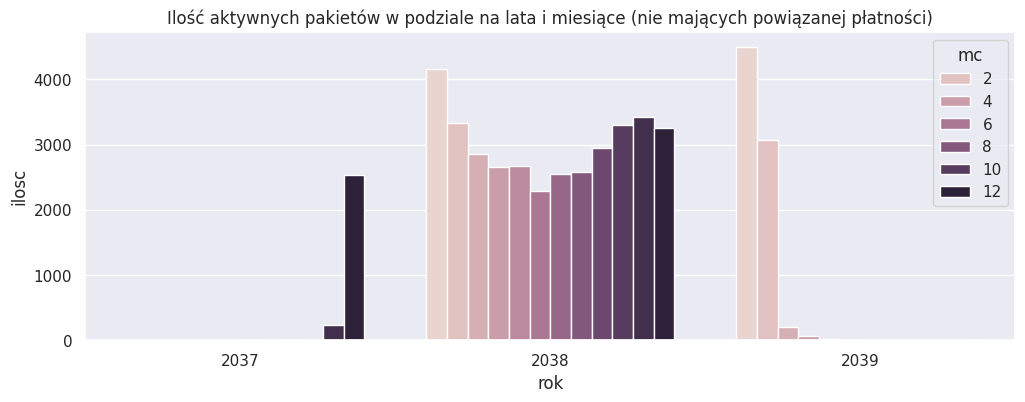

In [ ]:
# Barplot przedstawiający ilości aktywnych pakietów w podziale na rok i miesiąc (nie mających powiązanej płatności)
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=pakiet_rok_mc, y='ilosc', x='rok', hue='mc')
plt.title('Ilość aktywnych pakietów w podziale na lata i miesiące (nie mających powiązanej płatności)')
plt.show(g)

In [ ]:
# Wykorzystam ramkę z pakietami pogrupowaną ze względu na miesiąc
pakiet_mc = r[['id_pakietu']].groupby([ r['mc']]).agg(ilosc=('id_pakietu', 'count'))
pakiet_mc

,ilosc
mc,
1,8658
2,6402
3,3048
4,2719
5,2693
6,2291
7,2552
8,2573
9,2951


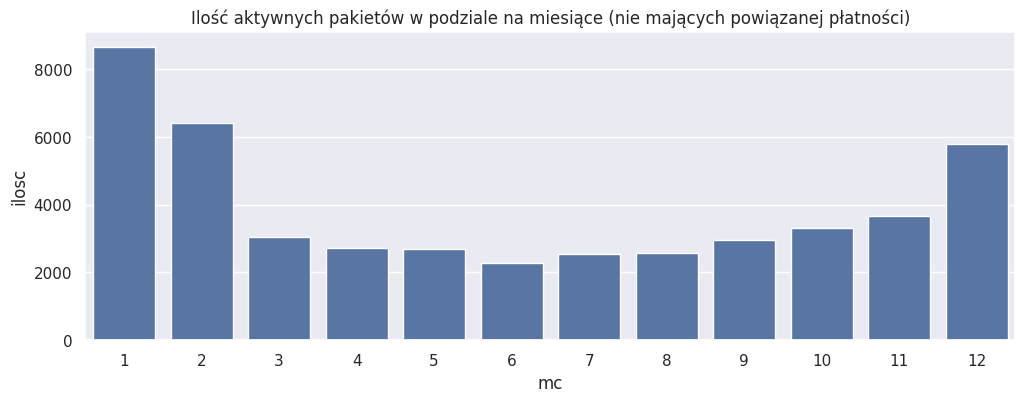

In [ ]:
# Barplot przedstawiający ilości aktywnych pakietów w podziale na miesiąc (nie mających powiązanej płatności) - najwięcej w styczniu i grudniu, najmniej w czerwcu i lipcu
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=pakiet_mc, y='ilosc', x='mc')
plt.title('Ilość aktywnych pakietów w podziale na miesiące (nie mających powiązanej płatności)')
plt.show(g)

# **Pytanie 4**

## Ile jest miesięcznie pierwszych płatności (jeden pojazd może mieć tylko jedną pierwszą płatność, każda kolejna to płatność powracająca)?

In [ ]:
# Ramka z platnosciami z podziałem na rok i miesiąc
platnosc_rok_mc = all[['id_pojazdu']].groupby([all['rok_platnosci'], all['mc_platnosci'], all['id_pojazdu']]).agg(licznik=('id_pojazdu', 'count')).reset_index()
platnosc_rok_mc

,rok_platnosci,mc_platnosci,id_pojazdu,licznik
0,2025,9,9d4564f66af8,1
1,2025,10,06b6ee29b751,1
2,2025,11,f09a17af4030,1
3,2026,1,c096b9da232c,1
4,2026,2,a1456016b732,1
...,...,...,...,...
25977,2039,4,ff7f3254a7b1,1
25978,2039,4,ff8c40d5be1a,1
25979,2039,4,ff97eae8bae3,1
25980,2039,4,ffe29833a5b7,1


In [ ]:
# Ramka z platnosciami z podziałem na miesiąc
platnosc_mc = all[['id_pojazdu']].groupby([all['mc_platnosci'], all['id_pojazdu']]).agg(licznik=('id_pojazdu', 'count')).reset_index()
platnosc_mc

,mc_platnosci,id_pojazdu,licznik
0,1,000aeb550c34,1
1,1,000b1fdae722,1
2,1,0031ea80036e,1
3,1,0059e4a6cd06,2
4,1,007482510354,1
...,...,...,...
24250,12,ff3cdf94ef3f,1
24251,12,ff3d16d768a3,1
24252,12,ff7095c39400,1
24253,12,ff7f3254a7b1,1


In [ ]:
# Wykorzystuję pozycje, dla których licznik wynosi 1, czyli została dokonana dokładnie jedna platność
platnosc_rok_mc_1 = platnosc_rok_mc[platnosc_rok_mc['licznik'] == 1]
platnosc_rok_mc_1.head()

,rok_platnosci,mc_platnosci,id_pojazdu,licznik
0,2025,9,9d4564f66af8,1
1,2025,10,06b6ee29b751,1
2,2025,11,f09a17af4030,1
3,2026,1,c096b9da232c,1
4,2026,2,a1456016b732,1


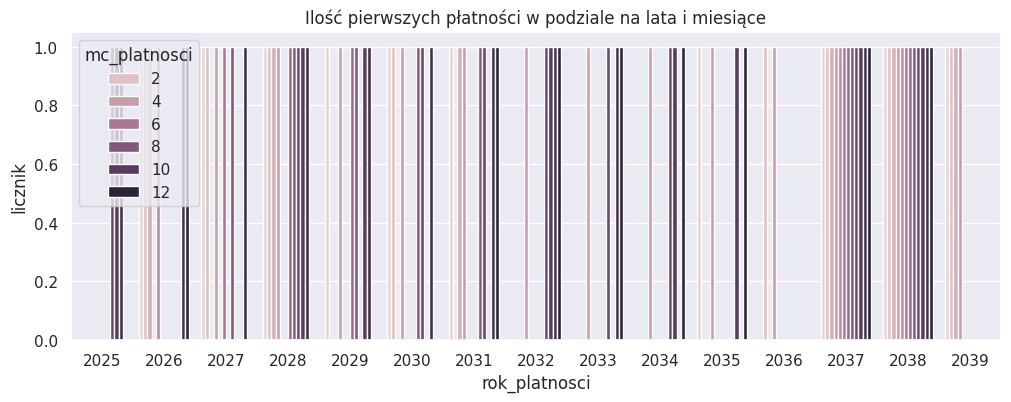

In [ ]:
# Barplot przedstawiający ilości pierwszych płatności w podziale na lata i miesiące
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=platnosc_rok_mc_1, y='licznik', x='rok_platnosci', hue='mc_platnosci')
plt.title('Ilość pierwszych płatności w podziale na lata i miesiące')
plt.show(g)

# **Pytanie 5**

## Ile jest miesięcznie powracających płatności (jeden pojazd może mieć tylko jedną pierwszą płatność, każda kolejna to płatność powracająca)?

In [ ]:
# Wykorzystuję wcześnie stworzoną ramkę, ale biorę pod uwagę wiersze z licznikiem większym od 1
platnosc_rok_mc_2 = platnosc_rok_mc[platnosc_rok_mc['licznik'] > 1]
platnosc_rok_mc_2

,rok_platnosci,mc_platnosci,id_pojazdu,licznik
202,2037,12,115018889a5e,2
293,2037,12,945cba36c2ba,2
294,2037,12,9591a60715b1,2
336,2037,12,ccf033284c13,2
383,2038,1,02b531a5d736,2
...,...,...,...,...
25898,2039,4,f7dd32e9a6ca,2
25910,2039,4,f91b572d6233,2
25926,2039,4,fb22c9986ae4,2
25937,2039,4,fc15d815f55f,2


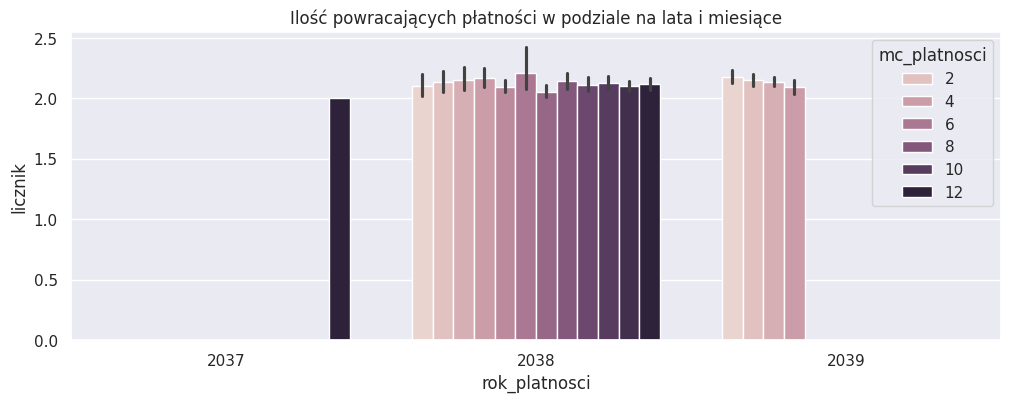

In [ ]:
# Barplot przedstawiający ilości powracających płatności w podziale na lata i miesiące
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=platnosc_rok_mc_2, y='licznik', x='rok_platnosci', hue='mc_platnosci')
plt.title('Ilość powracających płatności w podziale na lata i miesiące')
plt.show(g)

# **Komentarze i uwagi**

*   W rozważanym zadaniu usunęłam kolumnę pakiet z tabeli z płatnościami oraz pakietami. Było w nich sporo nieścisłości dotyczących dostępnych pakietów (w tabeli z płatnościami były o 4 nazwy pakietów więcej niż w tabeli z pakietami, co nie jest możliwe, ponieważ tabela pakiety powinna zawierać wszystkie dane dotyczące pakietów).

*   Ponadto usunęłam id_pojazdu z tabeli pakiety. Nie jest wykluczone, że dalsza analiza wykazałaby, że powinna ona pozostać (z drugiej strony jako tabelę bazową potraktowałam tabelę płatności i to w niej znajdowały się klucze obce wskazujące na dwie pozostałe tabele).

*  Dodatkowo, podczas łączenia ramek df1 i df2 metodą merge pojawił się jeden wiersz z brakiem wartości dla kolumny data_produkcji_poj (przed łączeniem nie było wartości brakujących, być może inny rodzaj łączenia okazałby się bardziej optymalny, a problem nie wystąpiłby).

*  Podczas łączenia ramki z pakietami z ww ramką pośrednią pojawiło się wiele wartości brakujących w kolumnach pakiet_start i pakiet_koniec. Ten problem również powinien zostać zbadany i przeanalizowany.

*  W pytaniu 2, jako datę aktywności pakietu przyjęłam datę płatności. Do rozważenia były także daty w kolumnach pakiet_start oraz pakiet_koniec. Zaobserwowałam, że czasami data płatności nie zawierała się w przedziale od pakiet_start do pakiet_koniec, co nie powinno występować.

*  W pytaniu 3, jako datę aktywności pakietu przyjęłam datę pakiet_start. Do rozważenia były także daty w kolumnach data_platnosci oraz pakiet_koniec. Zaobserwowałam, że czasami data płatności nie zawierała się w przedziale od pakiet_start do pakiet_koniec, co nie powinno występować.

*  W pytaniach 4 i 5 należałoby lepiej zinterpretować istotę problemu.



